## A demo of the mean-shift clustering algorithm
Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#example-cluster-plot-mean-shift-py

In [2]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [4]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers = centers, cluster_std=0.6)

In [5]:
# Compute clustering with Meanshift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples = 500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print("Number of estimated clusters: %d" % n_clusters)

Number of estimated clusters: 3


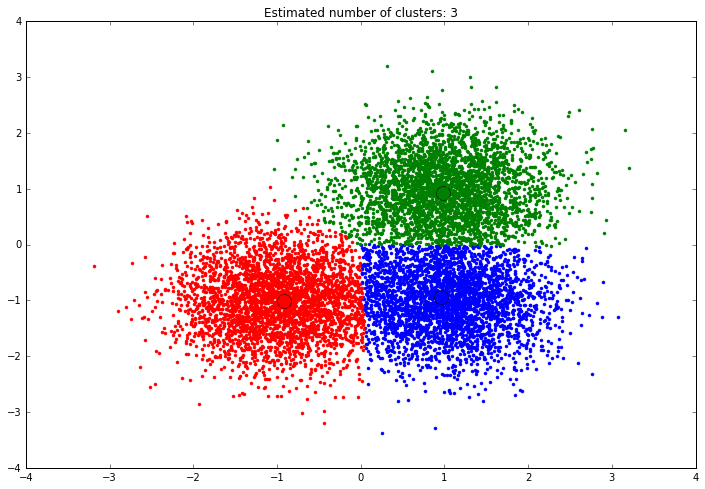

In [7]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(12,8))
colors = cycle('bgrcmyk')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members,1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize = 14)
    
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()